In [1]:
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

data = pd.read_csv("D:\\AWA\\auto_quad_scan\\run_data.txt", delimiter="\t")

In [2]:
data

,Unnamed: 0,AWA:Bira3Ctrl:Ch04,13ARV1:Sx,13ARV1:image1:ArraySize0_RBV,13ARV1:image1:ArraySize1_RBV,AWAVXI11ICT:Ch1,13ARV1:Cx,13ARV1:Cy,13ARV1:Sy,13ARV1:penalty,xopt_runtime,xopt_error,grad,int_grad,sx_m
0,1,0.000000,13.749811,1920,1200,9.436998e-10,552.445900,398.341225,98.447457,-190.927854,7.116876,False,0.000000,0.000000,0.000539
1,2,0.100000,11.467449,1920,1200,9.204087e-10,553.234977,412.221699,96.967713,-208.170471,7.053062,False,0.089300,0.107160,0.000450
2,3,1.000000,14.069210,1920,1200,9.039754e-10,557.049438,500.904992,61.702882,-349.301177,7.057240,False,0.893000,1.071600,0.000552
3,4,2.000000,40.327361,1920,1200,1.008462e-09,559.470445,592.936693,22.091061,-303.947375,7.051994,False,1.786000,2.143200,0.001582
4,5,-5.000000,NaN,1920,1200,1.079404e-09,NaN,NaN,NaN,1000.000000,12.103349,False,-4.465000,-5.358000,NaN
5,6,5.000000,NaN,1920,1200,1.053098e-09,NaN,NaN,NaN,63.299680,22.210491,False,4.465000,5.358000,NaN
6,7,3.387743,76.856117,1920,1200,9.180978e-10,563.551016,717.203385,29.953487,-147.872934,7.055040,False,3.025255,3.630306,0.003015
7,8,4.304010,88.350083,1920,1200,1.063232e-09,561.182786,797.832266,54.962474,-27.925595,7.055503,False,3.843481,4.612177,0.003466
8,9,-0.595100,26.402233,1920,1200,9.262600e-10,551.602131,338.199890,118.044006,-88.641645,7.052773,False,-0.531425,-0.637709,0.001036
9,10,2.701142,61.238060,1920,1200,1.038219e-09,565.123078,656.896932,6.537799,-246.851584,17.157651,False,2.412120,2.894544,0.002403


In [3]:
data["sy_m"] = 3.9232781168265036e-05 * data["13ARV1:Sy"]
data["sx2"] = data["sx_m"]**2 * 1e6
data["sy2"] = data["sy_m"]**2 * 1e6

In [4]:
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from gpytorch.kernels import ScaleKernel, PolynomialKernel
from xopt.generators.bayesian.models.standard import StandardModelConstructor

from copy import deepcopy
from xopt.vocs import VOCS
vocs = VOCS(**{
    "variables": {
        "AWA:Bira3Ctrl:Ch04":[-5,5]
    },
    "objectives":{"sx2":"MAXIMIZE"},
    "constraints": {
        "13ARV1:penalty":["LESS_THAN",0],
        "sy2":["LESS_THAN", 0]
    }
    }
)
kernel = ScaleKernel(PolynomialKernel(2))
covar_module = {"sy2":deepcopy(kernel), "sx2": deepcopy(kernel)}
model_constructor = StandardModelConstructor(covar_modules=covar_module,
                                             use_low_noise_prior=False)
generator = BayesianExplorationGenerator(vocs=vocs, model_constructor=model_constructor)
generator.add_data(data)


In [5]:
help(generator)

Help on BayesianExplorationGenerator in module xopt.generators.bayesian.bayesian_exploration object:

class BayesianExplorationGenerator(xopt.generators.bayesian.bayesian_generator.BayesianGenerator)
 |  BayesianExplorationGenerator(*, vocs: xopt.vocs.VOCS, data: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index: [], model: botorch.models.model.Model = None, turbo_controller: xopt.generators.bayesian.turbo.TurboController = None, use_cuda: bool = False, model_constructor: xopt.generators.bayesian.base_model.ModelConstructor = StandardModelConstructor(name='standard', use_low_noise_prior=True, covar_modules={}, mean_modules={}, trainable_mean_keys=[]), numerical_optimizer: xopt.numerical_optimizer.NumericalOptimizer = LBFGSOptimizer(name='LBFGS', n_raw_samples=20, n_restarts=20, max_iter=2000), max_travel_distances: List[float] = None, fixed_features: Dict[str, float] = None, computation_time: pandas.core.frame.DataFrame = Empty DataFrame
 |  Columns: []
 |  Index:

torch.Size([100, 1, 3])


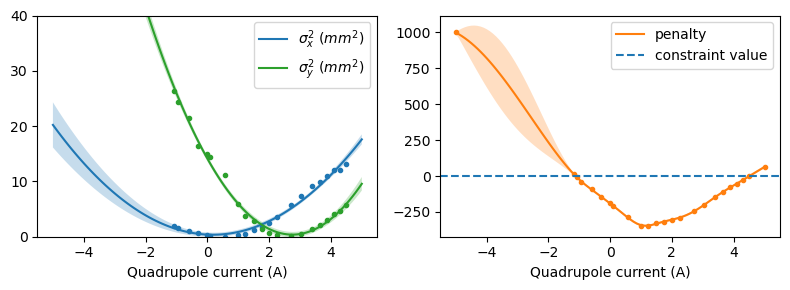

In [6]:
import torch
import matplotlib.pyplot as plt
test_x = torch.linspace(-5,5, 100)
model = generator.train_model()

fig,ax = plt.subplots(1,2, sharex="all")
fig.set_size_inches(8,3)
labels = ["$\sigma_x^2~(mm^2)$", "penalty" ,"$\sigma_y^2~(mm^2)$"]

with torch.no_grad():
    post = model.posterior(test_x.reshape(-1,1,1).double())
    print(post.event_shape)
    for i in range(post.event_shape[-1]):
        name = generator.vocs.output_names[i]
        a = ax[1] if "penalty" in name else ax[0]
        mean = post.mean[...,i].squeeze()
        l,u = post.mvn.confidence_region()
        a.plot(test_x, mean,f"C{i}", label=labels[i])
        a.fill_between(test_x, l[...,i].squeeze(), u[...,i].squeeze(), alpha=0.25,
                       fc=f"C{i}")


        generator.data.plot(x="AWA:Bira3Ctrl:Ch04", y=name, ax=a, style=".",
                            c=f"C{i}",legend=False)

h, l = ax[0].get_legend_handles_labels()
ax[0].legend(handles=[h[0],h[2]], labels=[l[0],l[2]])
ax[1].axhline(0,ls='--',label="constraint value")
h, l = ax[1].get_legend_handles_labels()

ax[1].legend(handles=[h[0],h[-1]], labels=[l[0],l[-1]])
ax[0].set_ylim(0, 40)
for a in ax:
    a.set_xlabel("Quadrupole current (A)")

fig.tight_layout()
fig.savefig("auto_quad_scan.svg")
fig.savefig("auto_quad_scan.png", dpi=300)

In [7]:
list(model.models[1].outcome_transform.named_buffers())

[('means', tensor([[-112.2648]], dtype=torch.float64)),
 ('stdvs', tensor([[269.1265]], dtype=torch.float64)),
 ('_stdvs_sq', tensor([[72429.0984]], dtype=torch.float64))]

In [8]:
len(model.models[2].train_targets)

21

In [9]:
model.models[0].covar_module

ScaleKernel(
  (base_kernel): PolynomialKernel(
    (raw_offset_constraint): Positive()
  )
  (raw_outputscale_constraint): Positive()
)

In [14]:
from botorch.models.gp_regression import SingleTaskGP
from botorch.models.transforms import Normalize, Standardize
from gpytorch import ExactMarginalLogLikelihood
from gpytorch.kernels import PolynomialKernel, ScaleKernel
from gpytorch.priors import GammaPrior
from botorch import fit_gpytorch_mll
from emitopt.utils import compute_emits


def visualize(
    k,
    y,
    q_len,
    distance,
    ax,
    n_samples=10,
    n_steps_quad_scan=10,
    covar_module=None,
    tkwargs=None,
):
    """
    Parameters:

        k: 1d numpy array of shape (n_steps_quad_scan,)
        representing the measurement quad geometric focusing strengths in [m^-2]
        used in the emittance scan

        y: 1d numpy array of shape (n_steps_quad_scan, )
            representing the beamsize outputs in [m] of an emittance scan
            with inputs given by k

        q_len: float defining the (longitudinal) quadrupole length or "thickness" in [m]

        distance: the longitudinal distance (drift length) in [m] from the measurement
                    quadrupole to the observation screen

        n_samples: the number of virtual measurement scan samples to evaluate for our "Bayesian" estimate

        n_steps_quad_scan: the number of steps in our virtual measurement scans

        covar_module: the covariance module to be used in fitting of the SingleTaskGP (modeling the function y vs. k)
                        If None, uses ScaleKernel(MaternKernel()).

        visualize: boolean. Set to True to plot the parabolic fitting results.

        tkwargs: dict containing the tensor device and dtype
    """
    if tkwargs is None:
        tkwargs = {"dtype": torch.double, "device": "cpu"}

    k = torch.tensor(k, **tkwargs)
    y = torch.tensor(y, **tkwargs)

    if covar_module is None:
        covar_module = ScaleKernel(
            PolynomialKernel(power=2), outputscale_prior=GammaPrior(2.0, 0.15)
        )
        #covar_module = ScaleKernel(
        #    MaternKernel(), outputscale_prior=GammaPrior(2.0, 0.15)
        #)

    model = SingleTaskGP(
        k.reshape(-1, 1),
        y.pow(2).reshape(-1, 1),
        covar_module=covar_module,
        input_transform=Normalize(1),
        outcome_transform=Standardize(1),
    )
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    k_virtual = torch.linspace(k.min(), k.max(), n_steps_quad_scan, **tkwargs)

    p = model.posterior(k_virtual.reshape(-1, 1))
    bss = p.sample(torch.Size([n_samples])).reshape(-1, n_steps_quad_scan)

    (emits, emits_sq, is_valid, abc_k_space) = compute_emits(
        k_virtual, bss, q_len, distance
    )
    #for i in range(10):
    #    c = "C0" if is_valid[i] else "C3"
    #    alpha = 0.25 if is_valid[i] else 1.0
    #    ax.plot(k_virtual, bss[i].detach(), c=c, alpha=alpha)

    #ax.plot(k.reshape(-1, 1), y.pow(2).reshape(-1, 1), "C1o",ms=4)

    return ax

C:\Users\Ryan Roussel\mambaforge\envs\awa-nn\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
C:\Users\Ryan Roussel\mambaforge\envs\awa-nn\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


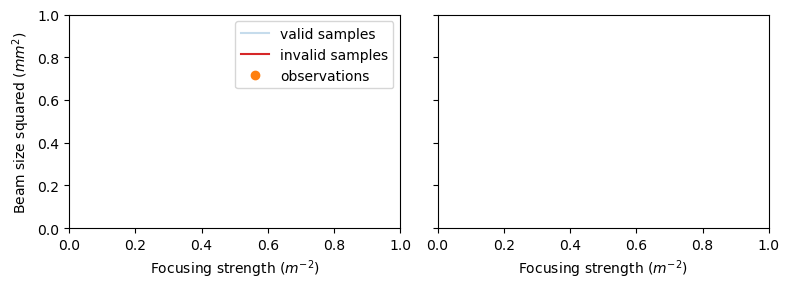

In [15]:
from emitopt.utils import get_valid_emit_samples_from_quad_scan, get_quad_strength_conversion_factor

beam_energy = 45*10**-3 # GeV
q_len = 0.12 # m
distance = 1.33-0.265 # m


data["grad"] = data["AWA:Bira3Ctrl:Ch04"] * 100 * 8.93e-3
data["int_grad"] = data["grad"] * q_len * 10
scale_factor = get_quad_strength_conversion_factor(beam_energy, q_len)
data["sx_m"] = 3.9232781168265036e-05 * data["13ARV1:Sx"]
data["sy_m"] = 3.9232781168265036e-05 * data["13ARV1:Sy"]


k = data.dropna()["int_grad"].to_numpy() * scale_factor
x = data.dropna()["sx_m"].to_numpy()*1e3
y = data.dropna()["sy_m"].to_numpy()*1e3

fig, ax = plt.subplots(1,2, sharex="all",sharey="all")
fig.set_size_inches(8,3)

visualize(
    k,
    x,
    q_len,
    distance,
    ax=ax[0],
    n_samples=20,
    n_steps_quad_scan=100,
)

visualize(
    k,
    y,
    q_len,
    distance,
    ax=ax[1],
    n_samples=20,
    n_steps_quad_scan=100,
)

import matplotlib.lines as mlines
import matplotlib.markers as markers

valid_line = mlines.Line2D([],[],color="C0", alpha=0.25)
invalid_line = mlines.Line2D([],[],color="C3")
obs = mlines.Line2D([],[],marker="o",color="C1",linewidth=0)

ax[0].legend(labels=["valid samples", "invalid samples","observations"],
             handles=[valid_line, invalid_line, obs])

ax[0].set_ylabel(r"Beam size squared ($mm^2$)")
ax[0].set_xlabel(r"Focusing strength ($m^{-2}$)")
ax[1].set_xlabel(r"Focusing strength ($m^{-2}$)")
fig.tight_layout()
fig.savefig("scan_samples.svg")
fig.savefig("scan_samples.png", dpi=300)


c:\users\ryan roussel\documents\github\emitopt\emitopt\utils.py:987: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(k, **tkwargs)
c:\users\ryan roussel\documents\github\emitopt\emitopt\utils.py:988: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, **tkwargs)
c:\users\ryan roussel\documents\github\emitopt\emitopt\utils.py:987: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(k, **tkwargs)
c:\users\ryan roussel\documents\github\emitopt\emitopt\utils.py:988: UserWarning: To copy construct from a

tensor([0.0008], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([0.0040], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([[[ 3.2270],
         [-9.2858],
         [27.1439]],

        [[ 3.3589],
         [-9.5971],
         [27.5290]],

        [[ 3.2500],
         [-9.3448],
         [27.2242]],

        ...,

        [[ 3.2975],
         [-9.5317],
         [27.6652]],

        [[ 3.1570],
         [-9.1560],
         [26.8690]],

        [[ 3.1721],
         [-9.2121],
         [27.0559]]], dtype=torch.float64)
tensor(52.3459, dtype=torch.float64) tensor(3.8246, dtype=torch.float64)
tensor(84.0482, dtype=torch.float64) tensor(21.6703, dtype=torch.float64)


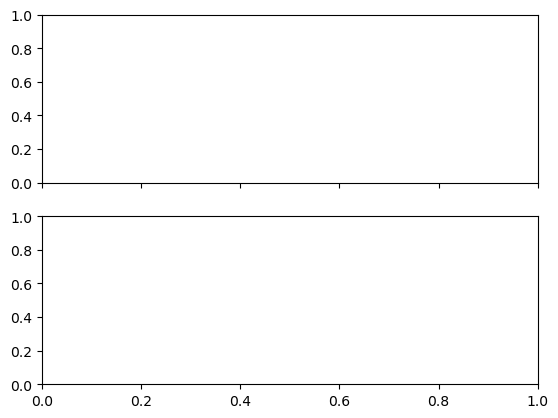

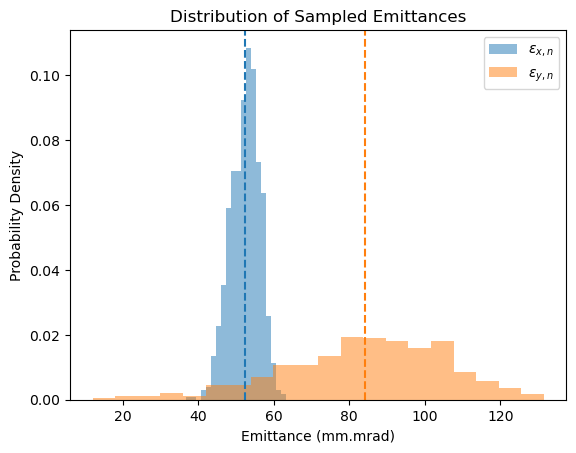

In [16]:
from emitopt.utils import get_valid_emit_samples_from_quad_scan, get_quad_strength_conversion_factor

beam_energy = 45*10**-3 # GeV
q_len = 0.12 # m
distance = 1.33-0.265 # m


data["grad"] = data["AWA:Bira3Ctrl:Ch04"] * 100 * 8.93e-3
data["int_grad"] = data["grad"] * q_len * 10
scale_factor = get_quad_strength_conversion_factor(beam_energy, q_len)
data["sx_m"] = 3.9232781168265036e-05 * data["13ARV1:Sx"]
data["sy_m"] = 3.9232781168265036e-05 * data["13ARV1:Sy"]


k = data.dropna()["int_grad"].to_numpy() * scale_factor
x = data.dropna()["sx_m"].to_numpy()*1e3
y = data.dropna()["sy_m"].to_numpy()*1e3

fig, ax = plt.subplots(2,1, sharex="all")

x_output_stats = get_valid_emit_samples_from_quad_scan(
    k,
    x,
    q_len,
    distance,
    n_samples=800,
    n_steps_quad_scan=100,
    visualize=False
)

y_output_stats = get_valid_emit_samples_from_quad_scan(
    k,
    y,
    q_len,
    distance,
    n_samples=800,
    n_steps_quad_scan=100,
    visualize=False
)

print(y_output_stats[-2])

fig,ax = plt.subplots()
colors = ["C0","C1"]
labels = [r"$\varepsilon_{x,n}$", r"$\varepsilon_{y,n}$"]
for i, samples in enumerate([x_output_stats[0].flatten(), y_output_stats[0].flatten()]):
    ax.hist(samples*90, bins=20, density=True,alpha=0.5,
             label=labels[i])
    mean = samples.mean()*90
    std = samples.std()*90
    ylim = ax.get_ylim()
    ax.axvline(mean,ls="--",c=colors[i])
    #ax.text(mean*1.05,ylim[1]*0.9,rf"${float(mean):.4} \pm {float(std):.4}$",
    #        horizontalalignment="left")

    print(mean,std)

ax.legend()

ax.set_title('Distribution of Sampled Emittances')
ax.set_xlabel('Emittance (mm.mrad)')
ax.set_ylabel('Probability Density')
fig.savefig("emittance_samples.png", dpi=300)